### 기대수명 데이터 둘러보기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# 예: CSV 파일 읽기
df = pd.read_csv('life.csv')
print(df.head())

       Country  Year      Status  Life expectancy  Adult mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   
3  Afghanistan  2012  Developing             59.5            272.0   
4  Afghanistan  2011  Developing             59.2            275.0   

   Infant deaths  Alcohol  Percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   
3             69     0.01               78.184215         67.0     2787  ...   
4             71     0.01                7.097109         68.0     3013  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0             

In [5]:
df.shape

(2938, 22)

In [6]:
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 years                 34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [7]:
# 결측치가 있는 행 제거
df.dropna(inplace=True) # 결측값 제거

print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 years                0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


In [10]:
df.shape

(1649, 22)

In [11]:
print('기대수명 데이터의 개요:')
print(df.describe())

기대수명 데이터의 개요:
              Year  Life expectancy  Adult mortality  Infant deaths  \
count  1649.000000      1649.000000      1649.000000    1649.000000   
mean   2007.840509        69.302304       168.215282      32.553062   
std       4.087711         8.796834       125.310417     120.847190   
min    2000.000000        44.000000         1.000000       0.000000   
25%    2005.000000        64.400000        77.000000       1.000000   
50%    2008.000000        71.700000       148.000000       3.000000   
75%    2011.000000        75.000000       227.000000      22.000000   
max    2015.000000        89.000000       723.000000    1600.000000   

           Alcohol  Percentage expenditure  Hepatitis B        Measles  \
count  1649.000000             1649.000000  1649.000000    1649.000000   
mean      4.533196              698.973558    79.217708    2224.494239   
std       4.029189             1759.229336    25.604664   10085.802019   
min       0.010000                0.000000     2.0

<Axes: >

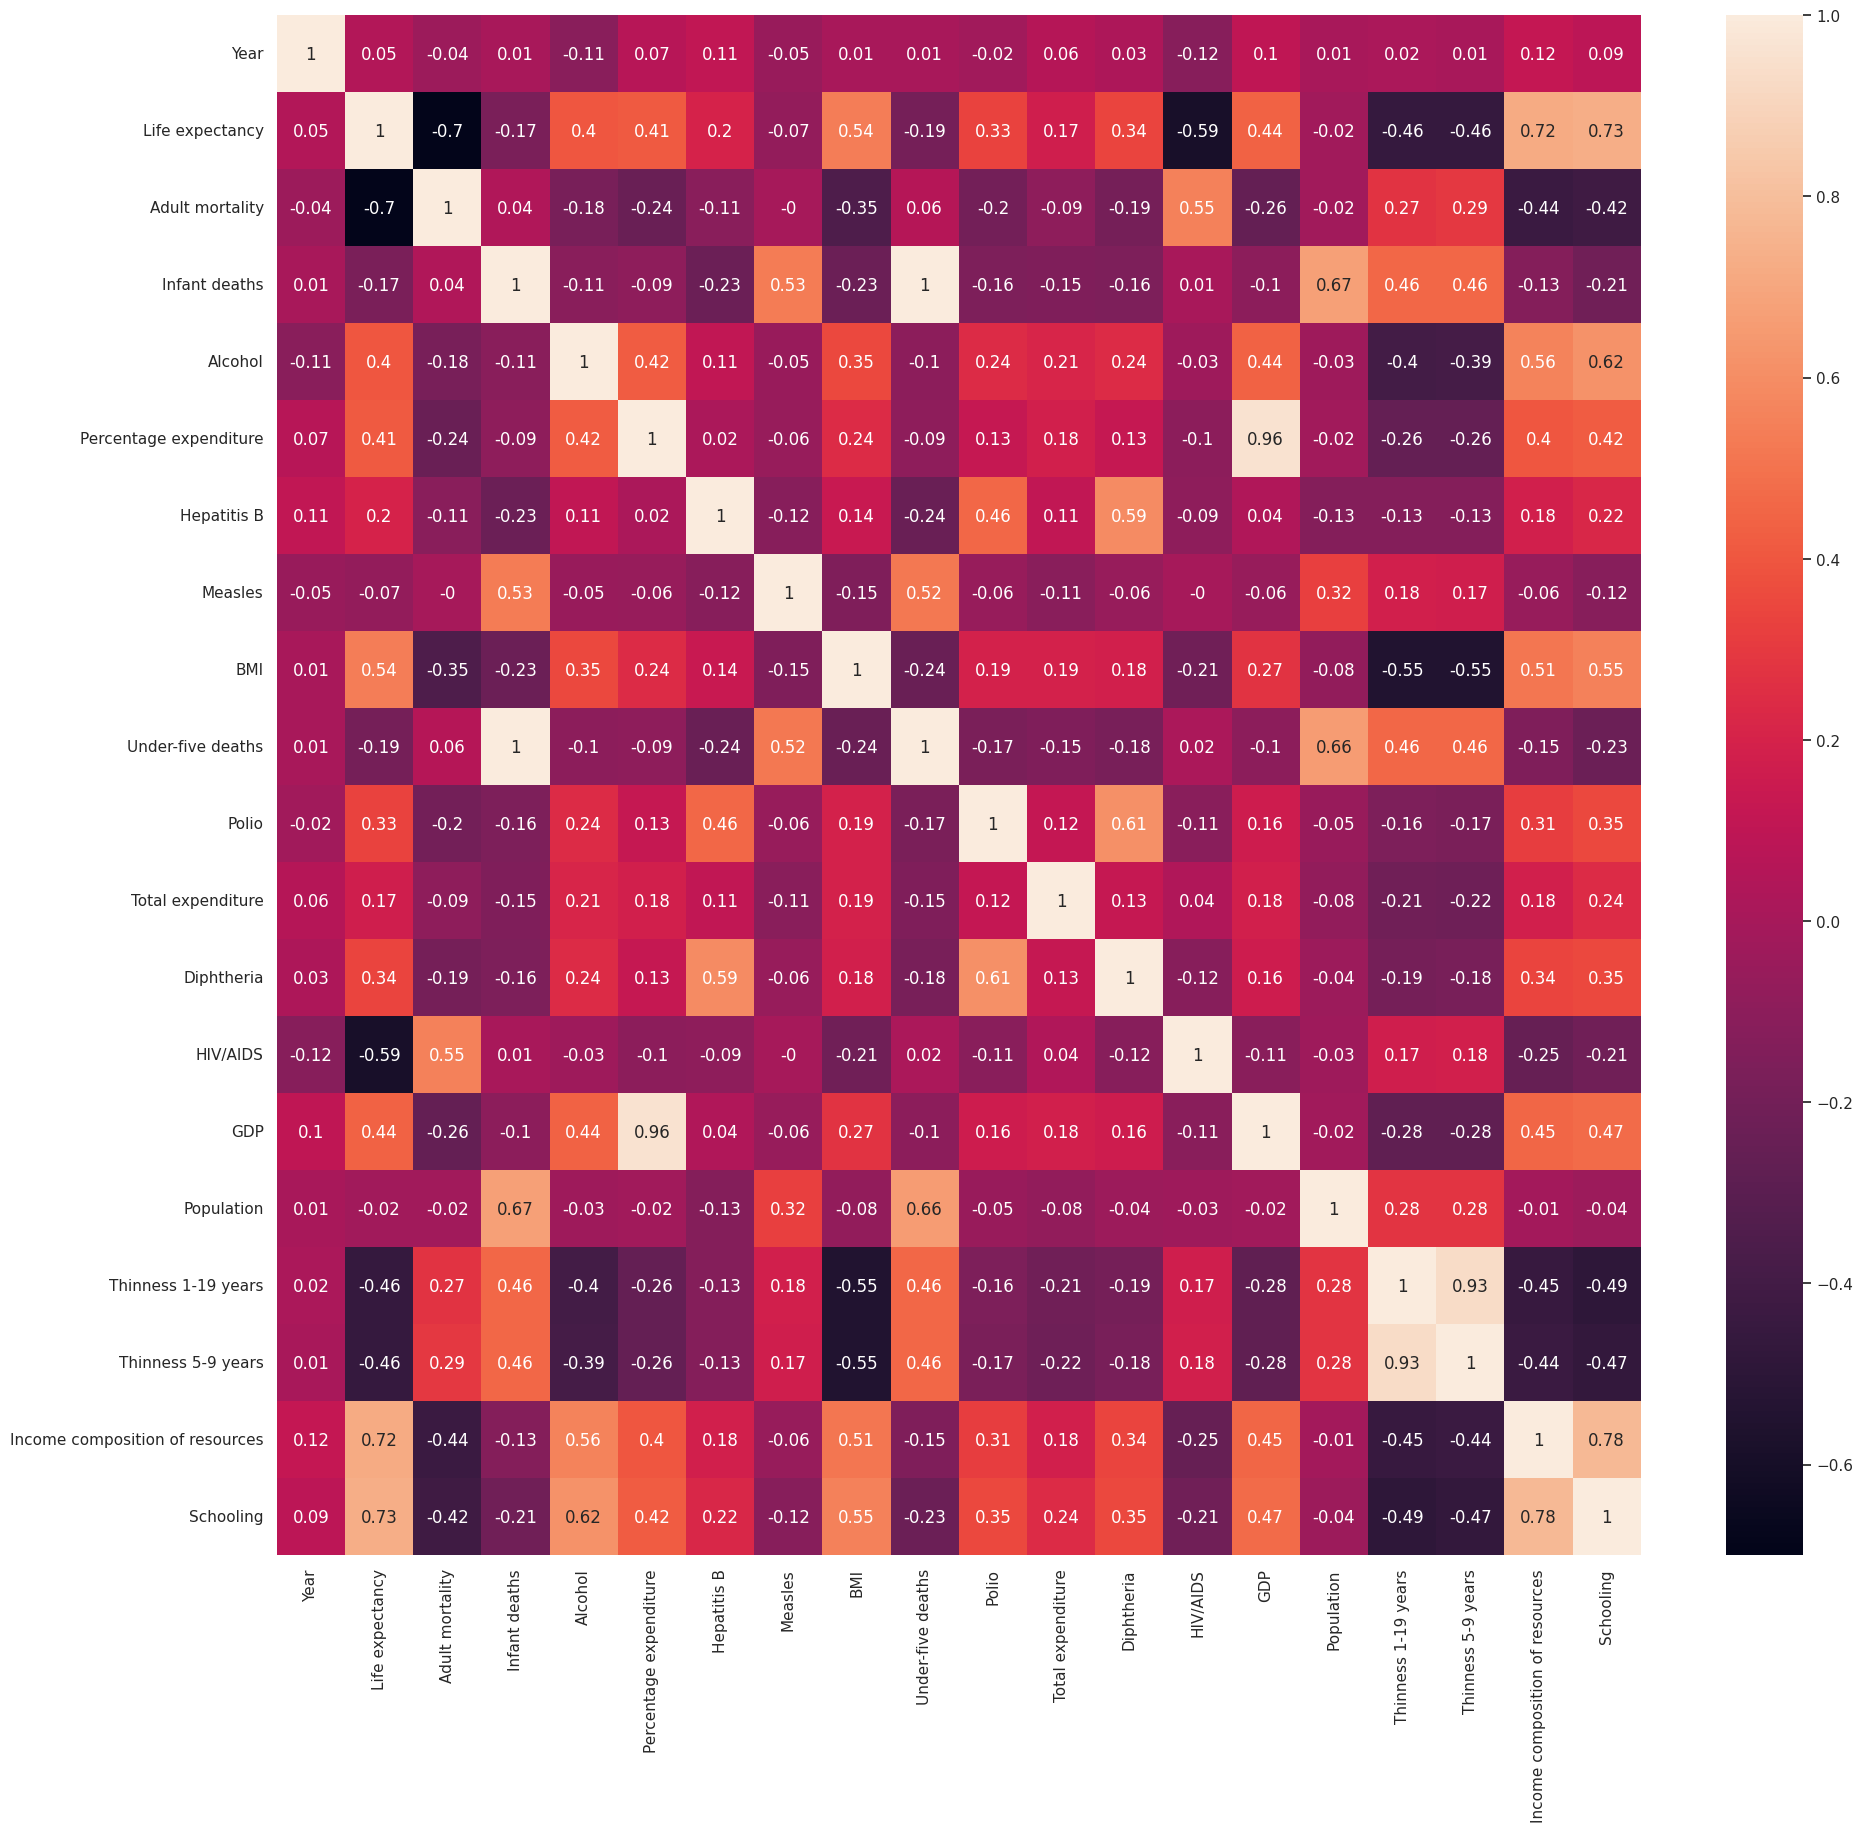

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시본 라이브러리의 크기를 지정
sns.set(rc={'figure.figsize':(22,20)})
# 상관행렬을 나타내어보자. 이때 수치 데이터에 대한 상관계수를 구하도록 하자
correlation_matrix = df.corr(numeric_only=True).round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### 8.4 기대수명과 상관도가 높은 데이터는 무엇인가

In [13]:
import numpy as np

# 'Life expectancy'와 다른 속성들의 소수점 둘째 자리 상관계수를 구함
c = df.corr(numeric_only=True).round(2)['Life expectancy']
c = np.abs(c)       # 상관계수의 절대값을 취한다
print(c.sort_values(ascending=False)) # 내림차순 정렬

Life expectancy                    1.00
Schooling                          0.73
Income composition of resources    0.72
Adult mortality                    0.70
HIV/AIDS                           0.59
BMI                                0.54
Thinness 5-9 years                 0.46
Thinness 1-19 years                0.46
GDP                                0.44
Percentage expenditure             0.41
Alcohol                            0.40
Diphtheria                         0.34
Polio                              0.33
Hepatitis B                        0.20
Under-five deaths                  0.19
Infant deaths                      0.17
Total expenditure                  0.17
Measles                            0.07
Year                               0.05
Population                         0.02
Name: Life expectancy, dtype: float64


### 8.5 쌍그래프로 특성 분석하기

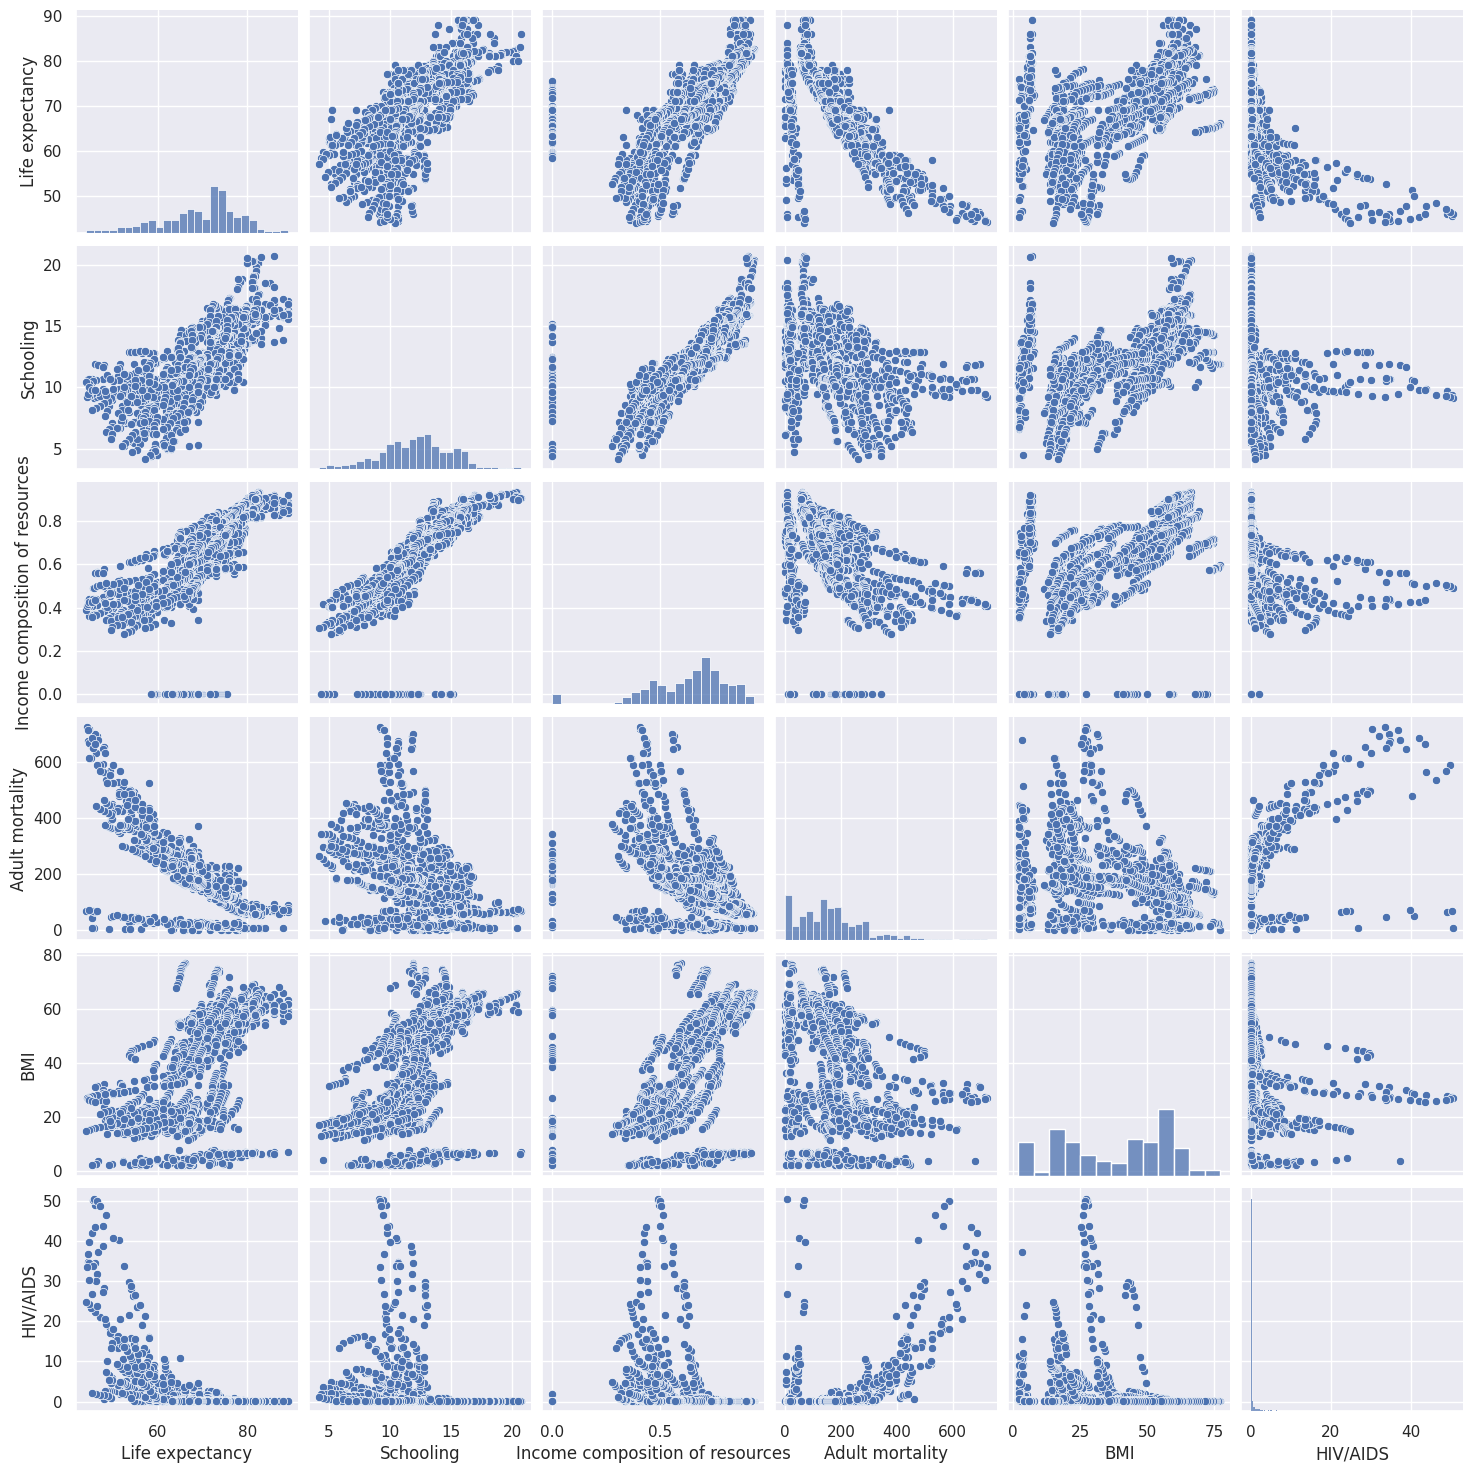

In [14]:
sns.pairplot(df[['Life expectancy', 'Schooling',\
                  'Income composition of resources',\
                  'Adult mortality', 'BMI', 'HIV/AIDS']])
plt.show()

In [15]:
main_features = ['Schooling','Income composition of resources','Adult mortality', 'BMI', 'HIV/AIDS']

X = df[main_features]
print(X)

      Schooling  Income composition of resources  Adult mortality   BMI  \
0          10.1                            0.479            263.0  19.1   
1          10.0                            0.476            271.0  18.6   
2           9.9                            0.470            268.0  18.1   
3           9.8                            0.463            272.0  17.6   
4           9.5                            0.454            275.0  17.2   
...         ...                              ...              ...   ...   
2933        9.2                            0.407            723.0  27.1   
2934        9.5                            0.418            715.0  26.7   
2935       10.0                            0.427             73.0  26.3   
2936        9.8                            0.427            686.0  25.9   
2937        9.8                            0.434            665.0  25.5   

      HIV/AIDS  
0          0.1  
1          0.1  
2          0.1  
3          0.1  
4          0.1

In [16]:
y = df['Life expectancy']
print(y)

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy, Length: 1649, dtype: float64


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=84, test_size = 0.2)

print(X_train.head())

      Schooling  Income composition of resources  Adult mortality   BMI  \
854         5.0                            0.405            286.0  16.5   
355        14.2                            0.730            148.0  53.6   
299         8.8                            0.000            263.0  16.1   
1013       11.2                            0.563            257.0  26.7   
1776        6.7                            0.318            424.0  17.7   

      HIV/AIDS  
854        0.7  
355        0.1  
299        0.3  
1013       0.9  
1776      15.3  


In [18]:
print(y_train.head())

854     62.9
355     74.5
299     64.2
1013    61.6
1776    51.0
Name: Life expectancy, dtype: float64


In [19]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [20]:
print('선형 회귀 모델의 점수=', regr.score(X_test, y_test))

선형 회귀 모델의 점수= 0.8188281290307104


In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = regr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)

MSE: 15.138139941551298
MAE: 2.9271138496212883
RMSE: 3.8907762646483923


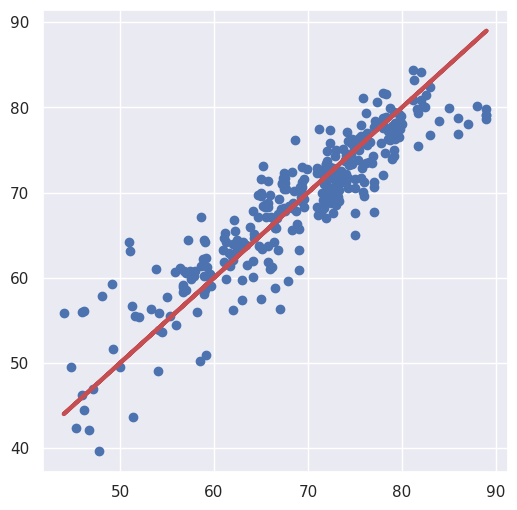

In [22]:
plt.figure(figsize=(6,6))
y_test_predict = regr.predict(X_test)
plt.scatter(y_test, y_test_predict)
plt.plot(y_test, y_test, color='r', linewidth=3)

In [27]:
print('선형 회귀 모델의 계수:', regr.coef_)

선형 회귀 모델의 계수: [ 1.02355124 11.13915807 -0.01830756  0.03804527 -0.43666098]


In [25]:
print('선형 회귀 모델의 절편:', regr.intercept_)

선형 회귀 모델의 절편: 52.29913357781774


In [28]:
y_pred=regr.predict(X_test)
print(y_pred)

[51.58752411 68.17149153 67.85676737 69.56462557 74.55154654 78.71962745
 76.43656932 75.09459818 75.87179742 72.10912038 55.81513874 65.23736838
 76.81784551 61.25094824 64.48539318 71.16251719 54.46444315 77.84872184
 55.5030569  72.56916213 70.56701949 71.08035137 71.98062029 76.19251643
 67.78498435 68.36620008 73.8176837  50.88712856 68.28242727 67.47580041
 64.18531018 69.47313311 76.81066843 78.057873   78.27664804 64.68405877
 73.92142385 68.11497796 75.87199816 55.55896865 64.13470395 74.29707617
 75.49147934 71.18339511 71.73409877 76.33300192 81.59437159 79.87259016
 72.94548106 77.04607041 79.21304161 70.65573263 61.07430367 44.43816952
 63.86846161 58.96837348 69.70351904 81.48815986 75.07358774 68.79350462
 70.62805192 67.18992354 75.77971839 73.60665749 73.47354429 64.62168821
 60.7397883  81.1180073  69.36401783 59.2522675  74.62342013 73.2289709
 71.32925939 62.95787854 79.35883237 55.97562275 73.05897169 84.37639461
 73.35454133 76.6234976  71.19479494 46.98093428 60.